In [2]:
import matplotlib.pyplot as plt
import pickle
import numpy as np

['-0.1 a', '0 a', '0.1 a', '0.2 a', '-0.1 s', '0 s', '0.1 s', '0.2 s']
['-0.1 a', '0 a', '0.1 a', '0.2 a', '-0.1 s', '0 s', '0.1 s', '0.2 s']
['-0.1 a', '0 a', '0.1 a', '0.2 a', '-0.1 s', '0 s', '0.1 s', '0.2 s']
['-0.1 a', '0 a', '0.1 a', '0.2 a', '-0.1 s', '0 s', '0.1 s', '0.2 s']


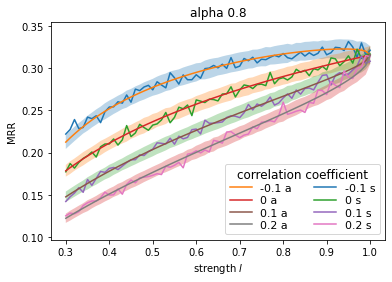

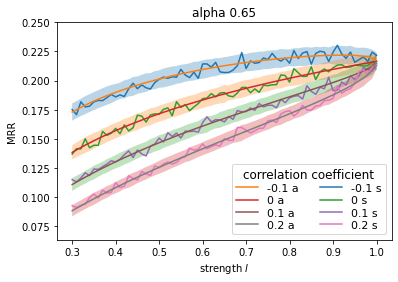

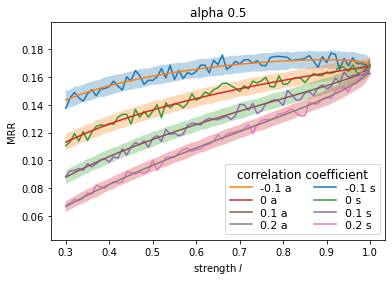

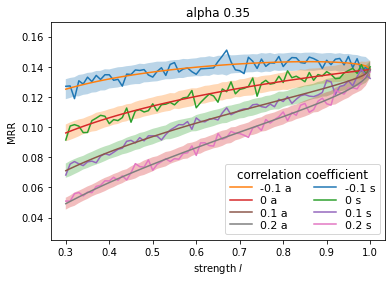

In [41]:
with open('approx_and_simu_cor.pkl', 'rb') as f:
    approx_dict = pickle.load(f)
cor_list = list(approx_dict.keys())
cor_list.remove(-0.3)
cor_list.remove(-0.2)
alpha_list = list(approx_dict[cor_list[0]].keys())
l_list = np.array(list(np.arange(0.3,1.01,.01)))
nentity = 14505
answer_rate = 0.01 * 0.3
Eular = 0.577215665
A = int(nentity * answer_rate)
for alpha in alpha_list:
    plt.figure()
    draw1 = []
    draw2 = []
    max_y = 0
    min_y = 1
    for rho in cor_list:
        draw1.append(plt.plot(l_list, approx_dict[rho][alpha]['MRR'], label=str(rho))[0])
        l_missing = l_list + np.sqrt(np.maximum(l_list * (1-l_list) * alpha / (1-alpha), 0)) * rho 
        # print(l_missing)
        l_test = l_list - np.sqrt(np.maximum(l_list * (1-l_list) * (1-alpha) / alpha, 0)) * rho
        analy = l_test / l_missing * (np.log(np.maximum(l_missing * (1-alpha) * (A+2), 0)) + Eular)/((A+1)*(1-alpha))
        draw2.append(plt.plot(l_list, analy, label=str(rho)+'_')[0]) # analytic expectation
        MRR_std = approx_dict[rho][alpha]['MRR_std']
        plt.fill_between(l_list, analy - 2* np.array(MRR_std), analy + 2 * np.array(MRR_std), alpha=0.3) # fill standard deviation
        max_y = max(max_y, max(analy + 2 * np.array(MRR_std)))
        min_y = min(min_y, min(analy - 2* np.array(MRR_std)))
    rho_list_ = [str(i)+' s' for i in cor_list]
    rho_list__ = [str(i)+' a' for i in cor_list]
    from itertools import chain
    rho_list___=list(rho_list__+rho_list_)
    print(rho_list___)
    plt.legend(draw2+ draw1, rho_list___ ,title="correlation coefficient", fontsize=11, title_fontsize=12, labelspacing=0.2, ncol=2)
    # plt.title('Approximation and Simulation of $E(MRR)$ \nwith Correlation Coefficient $r={}$'.format(rho))
    plt.title('alpha {}'.format(alpha))
    plt.xlabel('strength $l$')
    plt.ylim([max(min_y-0.02,0),max_y+0.02])
    plt.ylabel('MRR')
    # plt.ylabel('variance of metric')
    f = plt.gcf()
    f.savefig('approx_and_simu_cor_{}.pdf'.format(alpha), bbox_inches='tight')

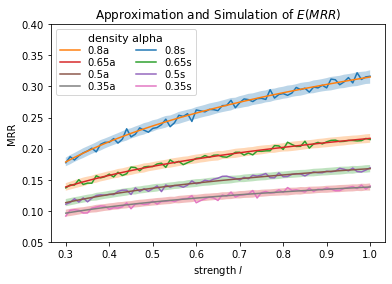

In [10]:
with open('approx_and_simu_cor.pkl', 'rb') as f:
    approx_dict = pickle.load(f)
approx_dict = approx_dict[0]
nentity = 14505
answer_rate = 0.01 * 0.3
A = int(nentity * answer_rate)
learning_success_rate_p_list = list(np.arange(0.3,1.01,.01))
density_list = [0.8, 0.65, 0.5, 0.35]
Eular = 0.577215665
draw1 = []
draw2 = []
for alpha in density_list:
    MRR = approx_dict[alpha]['MRR']
    MRR_std = approx_dict[alpha]['MRR_std']
    draw1.append(plt.plot(learning_success_rate_p_list, MRR, label=str(alpha))[0]) # expectation
    # draw.append(plt.plot(learning_success_rate_p_list, np.array(MRR_std)**2, label=str(alpha))[0]) # plot variance
    # plt.fill_between(learning_success_rate_p_list, np.array(MRR) - 2* np.array(MRR_std), np.array(MRR) + 2 * np.array(MRR_std), alpha=0.3) # fill standard deviation
    # N = int(answer_rate * alpha * nentity)
    # M = int(answer_rate * nentity) - N
    l = np.array(learning_success_rate_p_list)
    analy = (np.log(l * (1-alpha) * (A+2)) + Eular)/((A+1)*(1-alpha))
    draw2.append(plt.plot(learning_success_rate_p_list, analy, label=str(alpha)+'_')[0]) # analytic expecation
    plt.fill_between(learning_success_rate_p_list, analy - 2* np.array(MRR_std), analy + 2 * np.array(MRR_std), alpha=0.3) # fill standard deviation
    # draw.append(plt.plot(learning_success_rate_p_list, (1-l)/(l*N)*((np.log(l*(M+2))+Eular)/(M+1))**2+3/(8*(M+1)*N-19/(16*l*(M+1)*(M+2))), label=str(alpha)+'_')[0]) # analytic lower bound of variance
density_list__ = [str(i)+'s' for i in density_list]
density_list_ = [str(i)+'a' for i in density_list]
plt.legend(draw2+draw1, density_list_+density_list__ ,title="density alpha", fontsize=10, title_fontsize=11, labelspacing=0.2, ncol=2)
plt.title('Approximation and Simulation of $E(MRR)$')
plt.xlabel('strength $l$')
plt.ylim([0.05,0.4])
plt.ylabel('MRR')
# plt.ylabel('variance of metric')
f = plt.gcf()
f.savefig('approx_and_simu.pdf', bbox_inches='tight')